In [13]:
# In this exercise I will explore how the decision boundary is represented by the coefficients. To do
# so, first I will shows the decision boundary that is obtained from scikit-learn coefficients after fitting the model. And then
# I will change the coefficients manually and see how the decision boundary is changed. Further I have calculated the number of 
# errors in the prediction in each case that can be confirmed from decision plot.

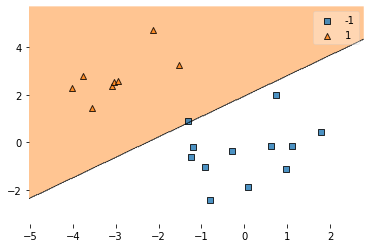

In [14]:
"--------------It will stop Future Warning message----------------------------"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
"-----------------------------------------------------------------------------"



"For the data"
import pandas as pd
"-----------------------------"
X=pd.read_csv('X.csv').values
y=pd.read_csv('y.csv')['0'].values

#print(X)
#print(y)
"----------------------------------"

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)
import matplotlib.pyplot as plt
import numpy as np

from mlxtend.plotting import plot_decision_regions      # I am using spyder in Anaconda. pip install mlxtend need to be run in Anaconda command prompt in order to import this module 

# Plotting decision regions
plot_decision_regions(X, y, clf=model)

plt.show()

In [15]:
print(y)
print(model.predict(X))
## Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

[-1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1]
[-1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1]
Number of errors: 1


Conclusion:
- There is only one error was found in the prediction (check sixth entry in the prediction matrix). This entry can also be seen in the decision region plot.
- Now I am going to change the coefficients manually and plot the decision boundary as below.

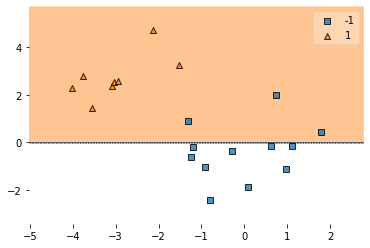

In [16]:
# Set the coefficients manually as below:
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

from mlxtend.plotting import plot_decision_regions
# Plotting decision regions
plot_decision_regions(X, y, clf=model)

plt.show()

In [17]:
print(y)
print(model.predict(X))
## Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

[-1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1]
[ 1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1]
Number of errors: 3


Conclusion:
- There are three errors were found in the prediction (check first, sixth and sixtennth entries in the prediction matrix). This entries can also be seen in the decision region plot. 
- This decision region in this plot is completely different than first. 
- Now I am computing the loss function on the Boston housing data set and compare the result with the results of built-in module.

In [18]:
"-------Collecting the Data----------------------"
import sklearn.datasets

house_data=sklearn.datasets.load_boston()

X=house_data.data
y=house_data.target
"-------------------------------------------------"

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true-y_i_pred)**2
    return s
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28967621e-02  4.87152964e-02 -4.05677650e-03  2.85399038e+00
 -2.86841231e+00  5.92815405e+00 -7.26932412e-03 -9.68512896e-01
  1.71156290e-01 -9.39663386e-03 -3.92187158e-01  1.49054725e-02
 -4.16304130e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


Conclusion: 
- Coefficients that are obtained from LinearRegression are almost the same as that were obtained from our defined loss function. 